# CS-746-25633-FALL2023

# Perspectives on Data Science Project

**Team Members:** 
* Rahul Ganji - r555a723, 
* Yakkanti Lakshmi Mrudhula -- r529e468,
* Kambhampati Veerendra -- s399h492,
* Maguluri teja -- x585y368,
* Badugu Nomusai -- n449c363,
* guda Jaswanth -- h466q395.

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV file into a Pandas DataFrame
df = pd.read_csv('questionnaire_responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 47 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                 373 non-null    object 
 1   Are you an international student?                                                                                         373 non-null    object 
 2   This questionnaire helps the new international students coming to WSU. Do you want to fill this form?                     12 non-null     object 
 3   What is your WSU id?                                                                                                      362 non-null 

In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 373
Number of columns: 47


**Findings:** There are 47 columns and 373 rows altogether. The only available data types are float64 and object.

# DATA PRE-PROCESSING

**Findings:** There is a lot of unnecessary data in the dataset, including Timestamps and other information, and certain columns are not filled entirely from the top to the bottom. Additionally, some rows include unordered data, for example, when asked for the time, they provided the string "fffghfhg." Therefore, we made every effort to clean our dataset.

In [4]:
# The dataset is clumsy to read so we need to remove the unwanted columns
# Drop unwanted columns from the DataFrame
df2 = df.drop(['Timestamp','Are you an international student?',
               'What is your current address?', 
               'This questionnaire helps the new international students coming to WSU. Do you want to fill this form?', 
               'What is your WSU id?','Since arriving in Wichita, how many times have you relocated to different places?',
               'What was the name and address of the apartment where you previously resided?',
               'How satisfied were you about your stay in your previous apartment?',
               'What was the reason you vacated your previous apartment?','Where are you currently residing?',
               'If other, Please specify where you are currently residing at.','How satisfied are you with your current stay?',
               'Any other info/suggestions?','If other, Please specify your apartment name.',
               'If other, please specify number of people staying with you.','What are all the amenities that are included in your rent?',
               'How difficult is it to find a ride/cab to travel from your residence to university?',
               'How much it costs you to travel from your residence to university?',
               'What is the duration of time it takes you to drive from your residence to university?',
               'Is there a free parking lot allocated to your unit?','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46'], axis=1)

In [5]:
print("New rows:", df2.shape[0])
print("New columns:", df2.shape[1])

New rows: 373
New columns: 22


In [6]:
df2.columns

Index(['Where are you living currently?',
       'How long have you been in Wichita? (in months)',
       'What is your apartment name? (street name if housing)',
       'How many people are staying in your unit?',
       'What is the size of your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
       'Are you paying rental insurance for your unit monthly?',
       'If yes, what is your monthly rental insurance?',
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?',
       'Do your apartment require g

## 1.CHECK FOR DUPLICATES

In [7]:
duplicate_count = df2.duplicated().sum()
duplicate_count

9

In [8]:
# Finding and displaying duplicates
duplicates = df2[df2.duplicated()]
duplicates

,Where are you living currently?,How long have you been in Wichita? (in months),What is your apartment name? (street name if housing),How many people are staying in your unit?,What is the size of your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?",...,"What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",Do your apartment require guarantor?,Is your apartment pet friendly?,What is your preferred mode of transportation when leaving your residence?,What is the duration of time it takes you to walk to or from WSU?,What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?,What type of laundry amenities are available in your accommodation?
101,House you rent,10.0,21W,6,2 bed 2 bath,4.0,4.0,4.0,1050,200.0,...,200,Don't know,Yes,Transit,NaN,2.0,5.0,5.0,5.0,In the apartment complex
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,Apartment,3.0,The Landing,4,2 bed 1 bath,5.0,5.0,5.0,950,40.0,...,180,Don't know,Yes,Transit,NaN,5.0,5.0,5.0,5.0,In the apartment complex
275,Apartment,9.0,Brickstone,4,2 bed 1 bath,3.0,3.0,3.0,925,300.0,...,300,Don't know,Yes,Drive,NaN,NaN,NaN,10.0,10.0,In the apartment complex
276,Apartment,9.0,Parc,3,2 bed 2 bath,5.0,5.0,5.0,1100,1000.0,...,100,Yes,Yes,Transit,NaN,2.0,5.0,5.0,5.0,In the apartment complex


In [9]:
df3 = df2.drop_duplicates()

In [10]:
df3.duplicated().sum()

0

## 2.CHECK FOR MISSING VALUES

In [11]:
#check for null values
print(df3.isnull().sum())

Where are you living currently?                                                                                               1
How long have you been in Wichita? (in months)                                                                                1
What is your apartment name? (street name if housing)                                                                         6
How many people are staying in your unit?                                                                                     6
What is the size of your unit?                                                                                                6
Overall, how satisfied are you with your current living?                                                                      6
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      6
What are your thoughts on the level of safety in the vicinity of your residence?                        

**Findings:** Numerous null values exist with which analysis cannot be done. There is no use in analyzing the data if the target variable has no entries. Therefore, as this is the predictor variable, we would like to start by removing the column "Overall, how satisfied are you with your current living?". 

In [12]:
# drop rows with null values in a single column
df3 = df3.copy()
df3.dropna(subset=['Overall, how satisfied are you with your current living?'], inplace=True)
#check for null values
print(df3.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

* Many other missing values for different columns were set to 0 after the column "Overall, how satisfied are you with your current living?" question was removed.
* The column "If yes, what is your monthly rental insurance?" have 184 missing values. So, for the row having no insurance are set to 0 which makes the count for missing values to be 0 

In [13]:
# replace null values with integer 0 in a single column
df3['If yes, what is your monthly rental insurance?'].fillna(0, inplace=True)
print(df3.isnull().sum())

Where are you living currently?                                                                                               0
How long have you been in Wichita? (in months)                                                                                0
What is your apartment name? (street name if housing)                                                                         0
How many people are staying in your unit?                                                                                     0
What is the size of your unit?                                                                                                0
Overall, how satisfied are you with your current living?                                                                      0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)      0
What are your thoughts on the level of safety in the vicinity of your residence?                        

* Since there are only 362 rows in total out of which 326 are the values that are being missed for the column "What is the duration of time it takes you to walk to or from WSU?" it is better to remove the column rather than filling the missing values with some values.

In [14]:
# drop the 'What is the duration of time it takes you to walk to or from WSU?' column from the dataframe
df3.drop('What is the duration of time it takes you to walk to or from WSU?', axis=1, inplace=True)

Out of 362 rows, 143 values for two columns remain lacking. Because these two variables have separate apartments and different times to get to universities, they were eliminated. Therefore, rather than using them as means or averages across time, we shall eliminate those rows.

In [15]:
# drop the 143 rows for these two columns
# 'What is the duration of time it takes you to walk from your residence to the closest transit stop?'
# 'What is the duration of time it takes for transit to reach from your stop to the university?'
df3.dropna(subset=['What is the duration of time it takes you to walk from your residence to the closest transit stop?','What is the duration of time it takes for transit to reach from your stop to the university?'], inplace=True)

In [16]:
print(df3.isnull().sum())

Where are you living currently?                                                                                             0
How long have you been in Wichita? (in months)                                                                              0
What is your apartment name? (street name if housing)                                                                       0
How many people are staying in your unit?                                                                                   0
What is the size of your unit?                                                                                              0
Overall, how satisfied are you with your current living?                                                                    0
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)    0
What are your thoughts on the level of safety in the vicinity of your residence?                                      

**Findings:** As we can see above there are no null values present. Each column have something filled in it for eacn entry.

In [17]:
# print the number of rows and columns for new dataset after removing all unwanted values
print("Number of rows:", df3.shape[0])
print("Number of columns:", df3.shape[1])

Number of rows: 216
Number of columns: 21


## DATA TYPES

In [18]:
df3.dtypes

Where are you living currently?                                                                                              object
How long have you been in Wichita? (in months)                                                                              float64
What is your apartment name? (street name if housing)                                                                        object
How many people are staying in your unit?                                                                                    object
What is the size of your unit?                                                                                               object
Overall, how satisfied are you with your current living?                                                                    float64
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)    float64
What are your thoughts on the level of safety in the vicinity of your reside

* In some columns of FLOAT64 datatype there are some string values like 'fffghgfg' which must be removed by making them NaN values  and later identifying them as missing values.

In [19]:
# define a list of FLOAT64 data types columns to replace non-numeric values with NaN
cols_to_replace= ['How long have you been in Wichita? (in months)',
                  'Overall, how satisfied are you with your current living?',
                  'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
                  'What are your thoughts on the level of safety in the vicinity of your residence?',
                  'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
                  'What is the duration of time it takes you to walk from your residence to the closest transit stop?',
                  'What is the duration of time it takes for transit to reach from your stop to the university?',
                  'What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?',
                  'What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?']

In [20]:
# replace non-numeric values with NaN
for col in cols_to_replace:
    df3[col] = df3[col].apply(pd.to_numeric, errors='coerce')

In [21]:
# drop rows with null values in column
df3.dropna(subset=['What is the total monthly rent of your unit?','How many people are staying in your unit?','If yes, what is your monthly rental insurance?','What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], inplace=True)

In [22]:
# replace non-numeric values with NaN for OBJECT data types
df3['How many people are staying in your unit?'] = pd.to_numeric(df3['How many people are staying in your unit?'], errors='coerce')
df3['What is the total monthly rent of your unit?'] = pd.to_numeric(df3['What is the total monthly rent of your unit?'], errors='coerce')
df3['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = pd.to_numeric(df3['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'], errors='coerce')
df3['If yes, what is your monthly rental insurance?'] = pd.to_numeric(df3['If yes, what is your monthly rental insurance?'], errors='coerce')

In [23]:
# convert the column to floats
df3['How many people are staying in your unit?'] = df3['How many people are staying in your unit?'].astype(float)
df3['What is the total monthly rent of your unit?'] = df3['What is the total monthly rent of your unit?'].astype(float)
df3['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'] = df3['What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?'].astype(float)
df3['If yes, what is your monthly rental insurance?'] = df3['If yes, what is your monthly rental insurance?'].astype(float)

Here I have put a threshold of 5000. By viewing the columns we can conform that no values can have the value greater than 5000. For example, as per my knowledge of staying for one year in wichita there are no apartments (Where students are living) that costs more than 5000.

In [24]:
threshold = 5000

# Get the names of all float64 columns
float_cols = df3.select_dtypes(include=['int32']).columns.tolist()

# Iterate over each float64 column and remove the rows that have values greater than the threshold
for col in float_cols:
    df3 = df3.drop(df3[df3[col] > threshold].index)

In [25]:
# Select only numerical columns
numerical_cols = df3.select_dtypes(include=['number'])

# Replace NaN values with 0 in these columns
df3[numerical_cols.columns] = numerical_cols.fillna(0)

In [26]:
df3.dtypes

Where are you living currently?                                                                                              object
How long have you been in Wichita? (in months)                                                                              float64
What is your apartment name? (street name if housing)                                                                        object
How many people are staying in your unit?                                                                                   float64
What is the size of your unit?                                                                                               object
Overall, how satisfied are you with your current living?                                                                    float64
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)    float64
What are your thoughts on the level of safety in the vicinity of your reside

In [27]:
columns_to_convert = [
       'How long have you been in Wichita? (in months)',
       'How many people are staying in your unit?',
       'Overall, how satisfied are you with your current living?',
       'On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)',
       'What are your thoughts on the level of safety in the vicinity of your residence?',
       'What is the total monthly rent of your unit?',
       'What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?',
    'If yes, what is your monthly rental insurance?',    
       'What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?',
       'What is the duration of time it takes you to walk from your residence to the closest transit stop?',
       'What is the duration of time it takes for transit to reach from your stop to the university?',
       'What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?',
       'What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?']  # List of float columns to convert

for col in columns_to_convert:
    # Handle NaN values (filling with 0 as an example)
    df3[col] = df3[col].fillna(0)

    # Convert the column to integer type
    df3[col] = df3[col].astype(int)

In [28]:
df3.dtypes

Where are you living currently?                                                                                             object
How long have you been in Wichita? (in months)                                                                               int32
What is your apartment name? (street name if housing)                                                                       object
How many people are staying in your unit?                                                                                    int32
What is the size of your unit?                                                                                              object
Overall, how satisfied are you with your current living?                                                                     int32
On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)     int32
What are your thoughts on the level of safety in the vicinity of your residence?   

# EXPLORATORY DATA ANALYSIS

In [29]:
# print the number of rows and columns
print("-------SHAPE OF CLEAN DATA---------")
print("------------------------------------")
print("Number of Rows:", df3.shape[0])
print("Number of Columns:", df3.shape[1])

-------SHAPE OF CLEAN DATA---------
------------------------------------
Number of Rows: 216
Number of Columns: 21


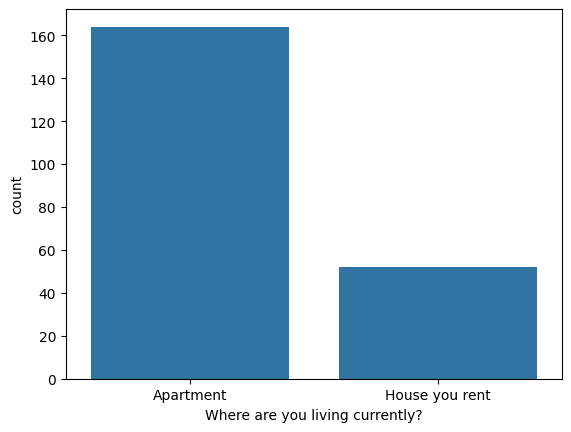

In [34]:
# Where are you living currently?
sns.countplot(x='Where are you living currently?', data=df3)
plt.show()

C:\Users\grahu\AppData\Local\Temp\ipykernel_15380\3086723089.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=90)


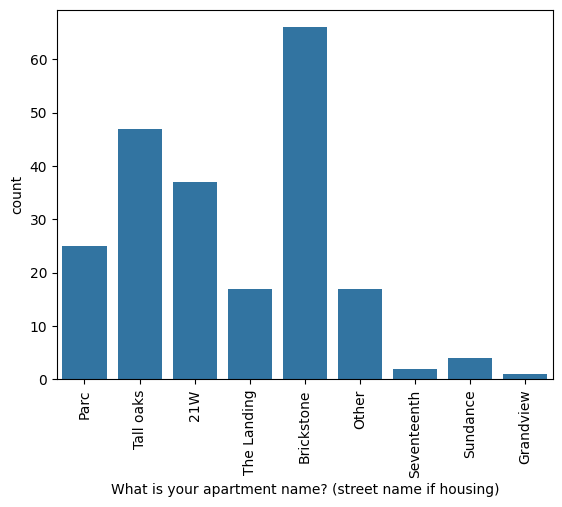

In [35]:
# What is your apartment name? (street name if housing)
a = sns.countplot(x='What is your apartment name? (street name if housing)', data=df3)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

C:\Users\grahu\AppData\Local\Temp\ipykernel_15380\2247495780.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), rotation=90)


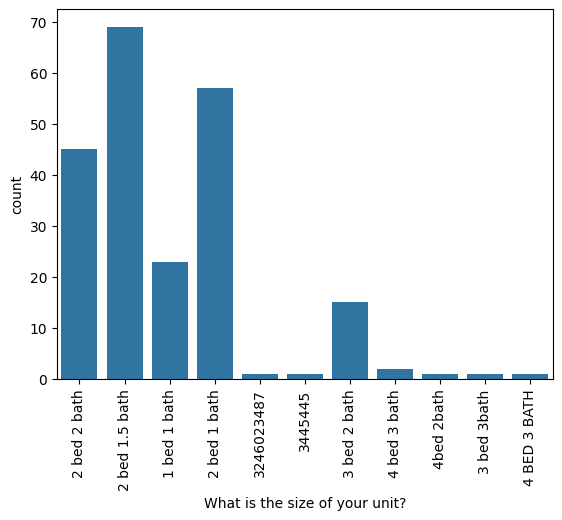

In [36]:
# What is the size of your unit?
b = sns.countplot(x='What is the size of your unit?', data=df3)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

C:\Users\grahu\AppData\Local\Temp\ipykernel_15380\2956770198.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  z.set_xticklabels(z.get_xticklabels(), rotation=90)


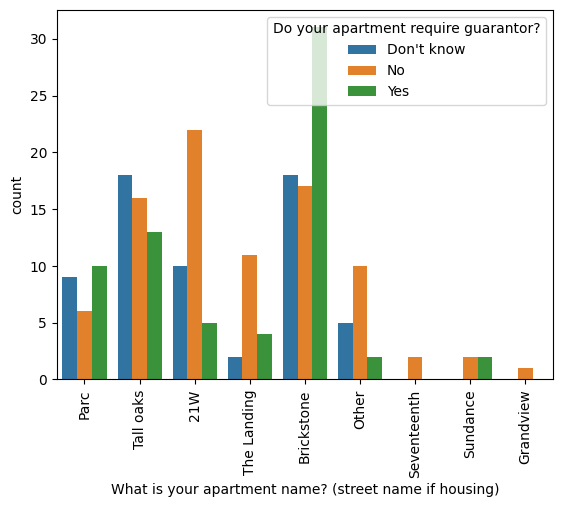

In [37]:
z= sns.countplot(x='What is your apartment name? (street name if housing)', hue='Do your apartment require guarantor?', data=df3)
z.set_xticklabels(z.get_xticklabels(), rotation=90)
plt.show()

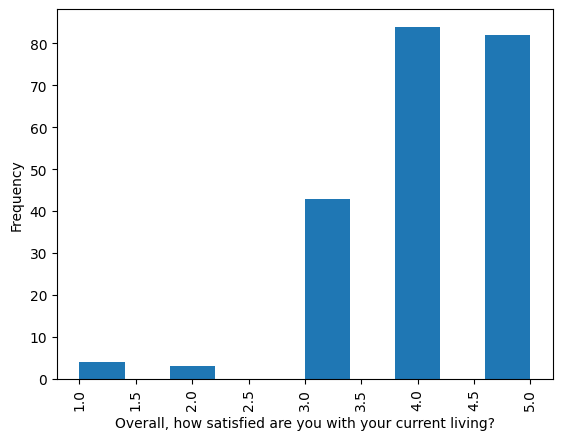

In [39]:
# Overall, how satisfied are you with your current living?
plt.hist(df3['Overall, how satisfied are you with your current living?'], bins=10)
plt.xlabel('Overall, how satisfied are you with your current living?')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## DESCRIPTIVE STATISTICS

In [30]:
# Set options to display decimal numbers instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df3.describe()

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?
count,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000
mean,-9942035.384,4.505,4.097,4.083,4.144,-19617356.995,-19568380.125,-7042602.199,-19714839.926,-9936556.606,-19881136.079,-19873199.426,-19883936.037
std,146117755.950,1.350,0.892,0.921,0.870,206222355.606,206242903.713,152394775.269,206191834.206,146118141.544,206160879.895,206161706.942,206160604.824
min,-2147483648.000,0.000,1.000,1.000,1.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000
25%,8.000,4.000,4.000,4.000,4.000,768.000,250.000,0.000,128.750,2.000,5.000,5.000,5.000
50%,9.000,4.000,4.000,4.000,4.000,900.000,500.000,0.000,250.000,5.000,7.000,6.000,10.000
75%,9.250,5.000,5.000,5.000,5.000,1045.000,1026.250,20.000,360.000,5.250,10.000,10.000,15.000
max,2024.000,8.000,5.000,5.000,5.000,56565665.000,67882982.000,626277272.000,36363737.000,636363.000,576576.000,2345642.000,34564.000


In [30]:
# Set options to display decimal numbers instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df3.describe()

,How long have you been in Wichita? (in months),How many people are staying in your unit?,"Overall, how satisfied are you with your current living?","On a scale of responsiveness, how efficient is the management of your apartment complex? (in maintenance services etc.,)",What are your thoughts on the level of safety in the vicinity of your residence?,What is the total monthly rent of your unit?,"What was the total amount you paid initially, covering fees such as application fees, deposit fees, and others?","If yes, what is your monthly rental insurance?","What is the approximate total amount of monthly bills (electricity, parking, etc.,) not included in your rent?",What is the duration of time it takes you to walk from your residence to the closest transit stop?,What is the duration of time it takes for transit to reach from your stop to the university?,"What is the approximate duration of time, in minutes, it takes for you to reach your closest grocery store?",What is the approximate duration of time it takes for you to reach your preferred nearby restaurant?
count,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000,216.000
mean,-9942035.384,4.505,4.097,4.083,4.144,-19617356.995,-19568380.125,-7042602.199,-19714839.926,-9936556.606,-19881136.079,-19873199.426,-19883936.037
std,146117755.950,1.350,0.892,0.921,0.870,206222355.606,206242903.713,152394775.269,206191834.206,146118141.544,206160879.895,206161706.942,206160604.824
min,-2147483648.000,0.000,1.000,1.000,1.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000,-2147483648.000
25%,8.000,4.000,4.000,4.000,4.000,768.000,250.000,0.000,128.750,2.000,5.000,5.000,5.000
50%,9.000,4.000,4.000,4.000,4.000,900.000,500.000,0.000,250.000,5.000,7.000,6.000,10.000
75%,9.250,5.000,5.000,5.000,5.000,1045.000,1026.250,20.000,360.000,5.250,10.000,10.000,15.000
max,2024.000,8.000,5.000,5.000,5.000,56565665.000,67882982.000,626277272.000,36363737.000,636363.000,576576.000,2345642.000,34564.000
